In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
mnist = fetch_openml("mnist_784")

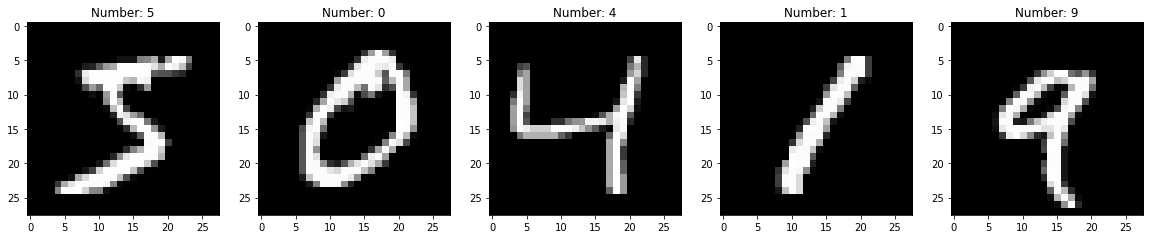

In [21]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Number: %s" % label)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [23]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9192857142857143
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
mdl.predict([X_test[0]])[0]

'8'

Prediction: 6


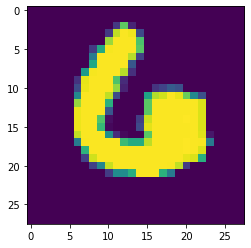

In [25]:
index = 3
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + mdl.predict([X_test[index]])[0])

In [26]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1391,    0,    1,    6,    2,   10,   11,    2,    6,    2],
       [   0, 1510,   10,    2,    0,    6,    1,    3,   12,    5],
       [   3,   15, 1254,   28,   10,    5,   17,   16,   27,    4],
       [   6,    8,   42, 1225,    1,   29,    3,   14,   31,   27],
       [   2,    5,   10,    8, 1236,    2,    8,    4,   17,   38],
       [  16,    8,   10,   53,   17, 1124,   29,    5,   55,   10],
       [  11,    5,   17,    1,   10,   19, 1325,    0,    4,    1],
       [   4,    5,   23,    9,   12,    0,    1, 1311,    5,   52],
       [  10,   19,   14,   35,   11,   34,    7,    7, 1210,   16],
       [   6,    5,    3,   20,   34,    5,    0,   51,   12, 1284]],
      dtype=int64)

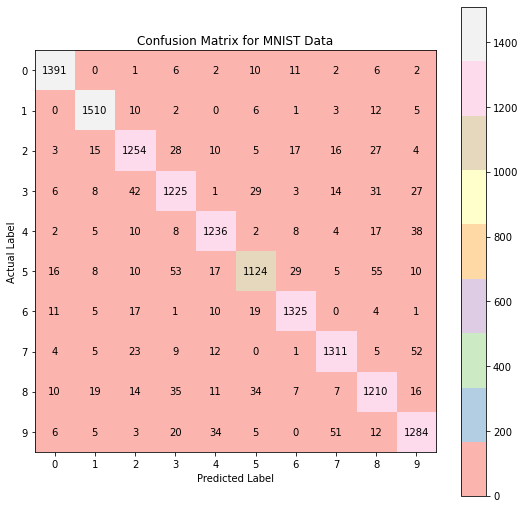

In [27]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')